In [1]:
import csv
import math

import matplotlib.pyplot as plt
import numpy as np

In [2]:
tols = []
with open('tolerance.csv', newline='') as csvfile:
    csv_reader = csv.reader(csvfile)
    header = next(csv_reader)
    for row in csv_reader:
        tols.append([float(r) for r in row])

In [3]:
header

['repetition',
 'tolerance',
 'buffer_capacity_1',
 'buffer_capacity_2',
 'lambda_1_1',
 'lambda_1_2',
 'lambda_2',
 'mu_1',
 'mu_2',
 'num_of_servers_1',
 'num_of_servers_2',
 'system_capacity_1',
 'system_capacity_2',
 'threshold_1',
 'threshold_2',
 'time_taken']

In [4]:
data = np.array(tols)

In [5]:
def find_specific_rows_in_data(data, parameters, start=1, end=-1):
    sample = []
    for row in data:
        if list(row[start:end]) == parameters:
            sample.append(row)
    return np.array(sample)

In [6]:
def find_rows_with_specific_tolerance(data, tolerance):
    sample = []
    for row in data:
        if row[1] == tolerance:
            sample.append(row)
    return np.array(sample)

# Specific parameter sets

In [7]:
tol_set = [1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]

In [8]:
parameters = [8,8,3,3,4,4,3,2,3,8,8,4,5]

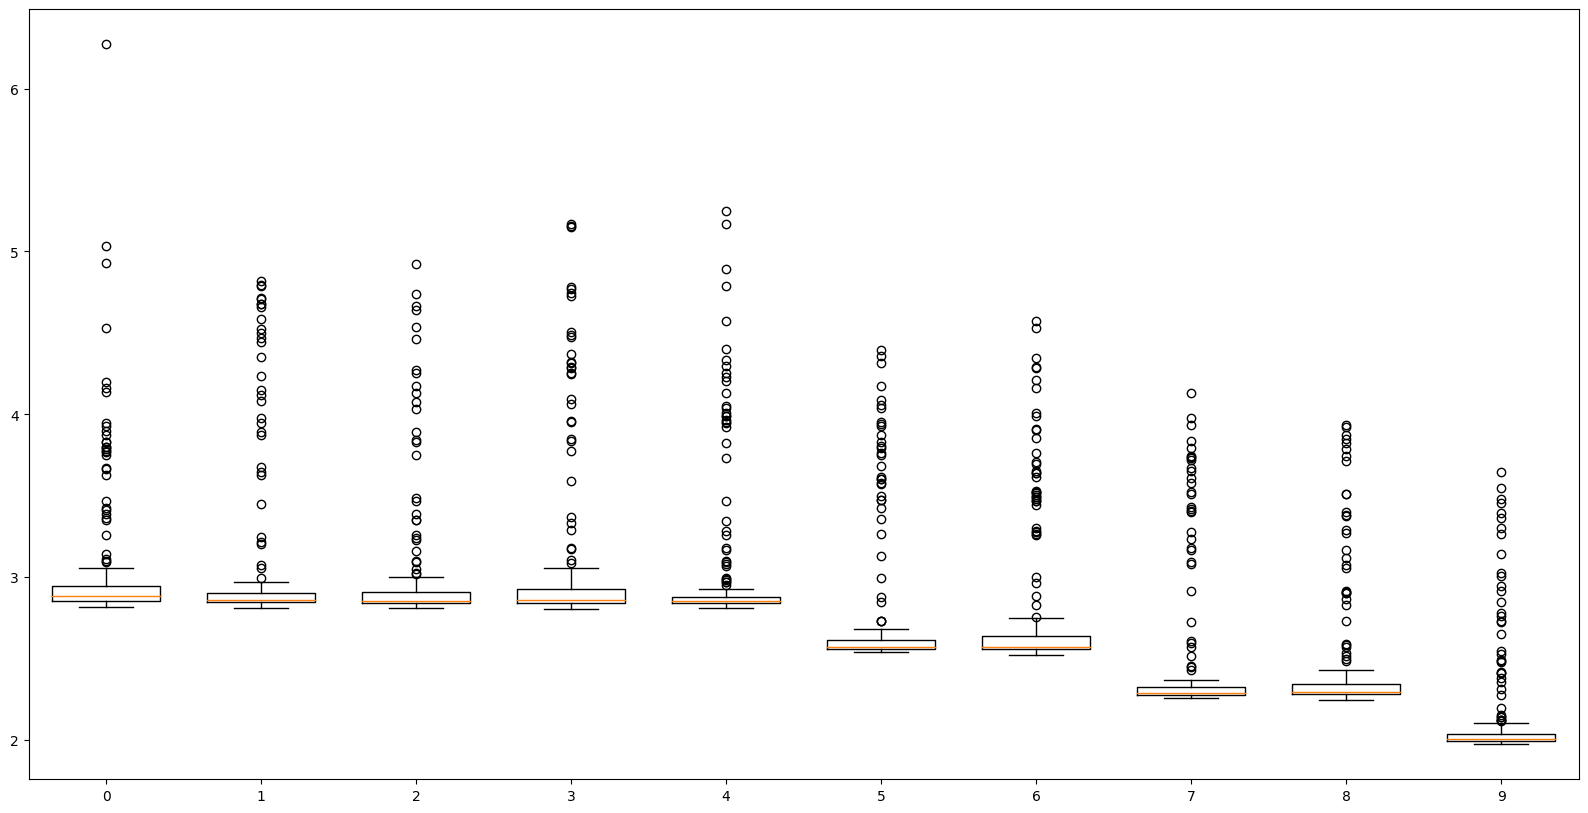

In [10]:
plt.figure(figsize=(20, 10))
for pos, tol in enumerate(tol_set):
    plt.boxplot(
        find_specific_rows_in_data(data, [tol] + parameters)[:, -1], positions=[pos], widths=0.7
    )
plt.show()

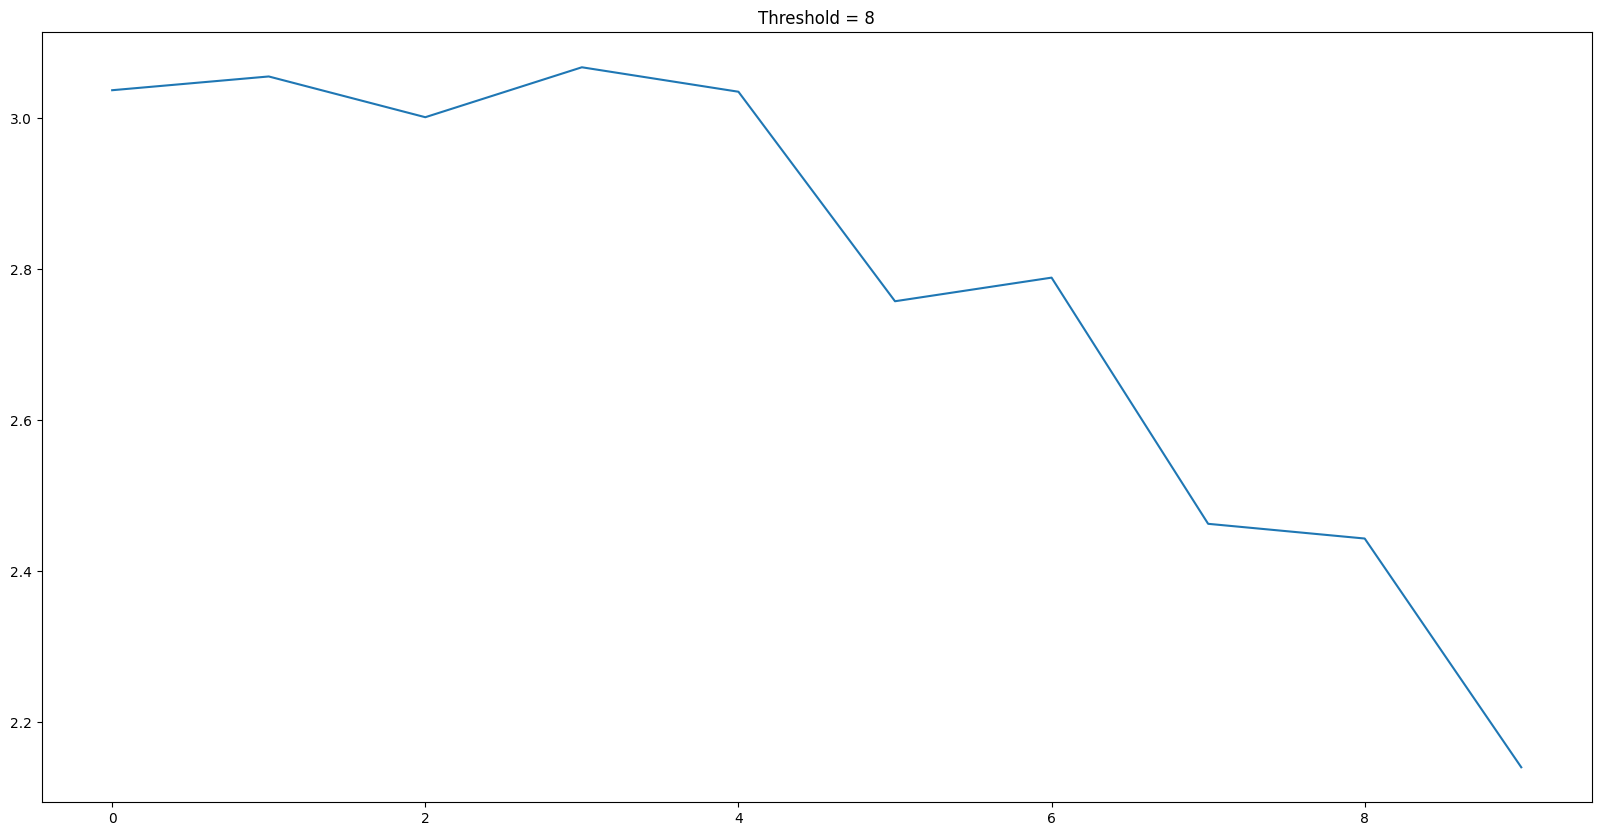

In [34]:
plt.figure(figsize=(20, 10))
plot_list = []
for tol in tol_set:
    plot_list.append(np.mean(find_specific_rows_in_data(data, [tol] + parameters)[:, -1]))
plt.plot(plot_list)
plt.title("Threshold = 8")
plt.show()

In [238]:
parameters = [8,8,3,3,4,4,3,2,3,15,8,4,5]

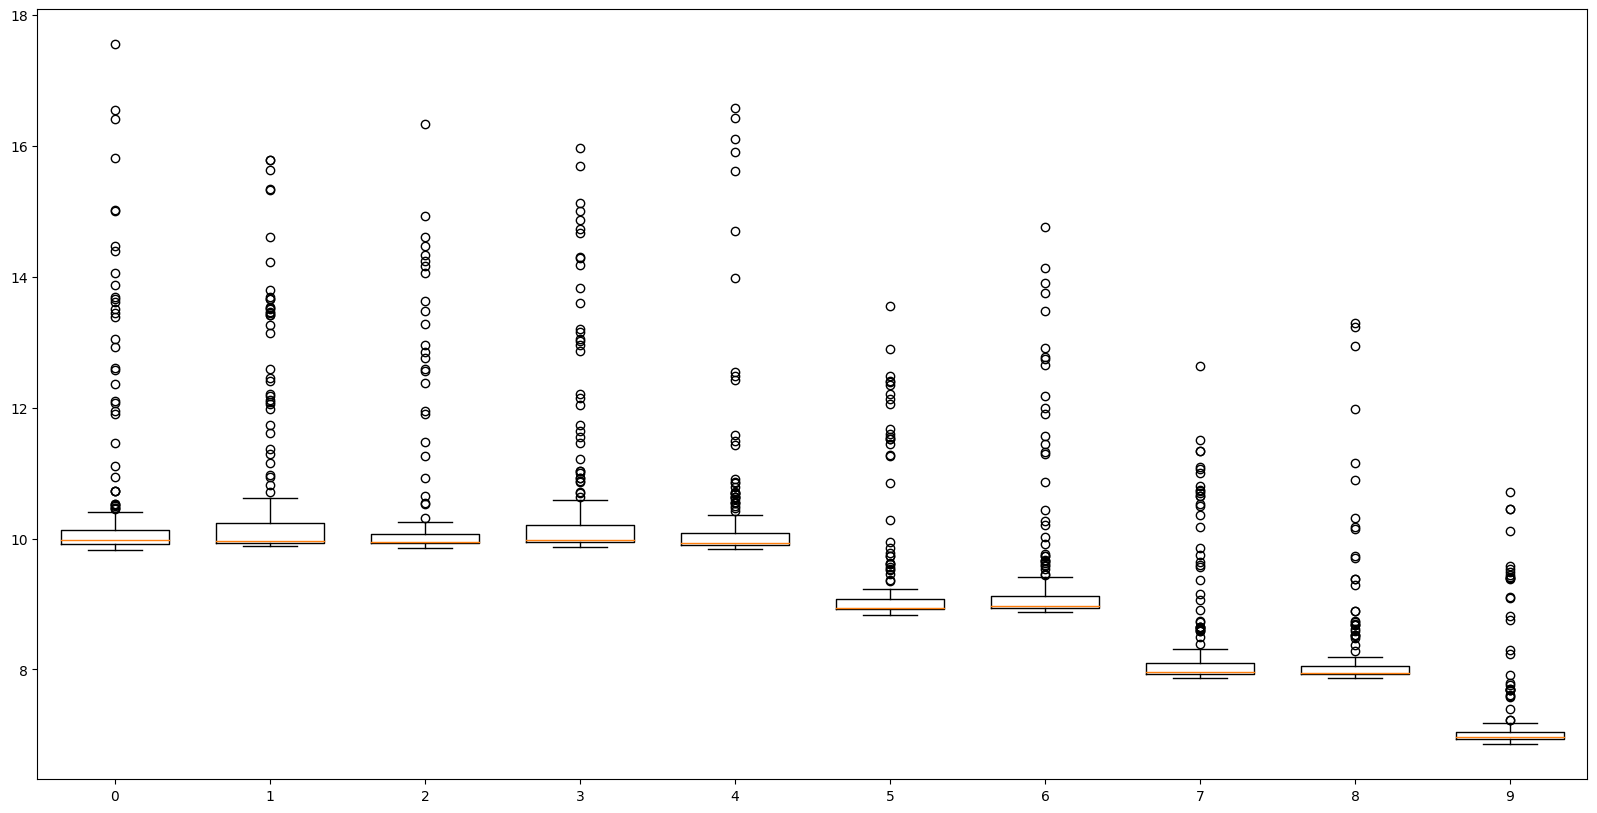

In [239]:
plt.figure(figsize=(20, 10))
for pos, tol in enumerate(tol_set):
    plt.boxplot(
        find_specific_rows_in_data(data, [tol] + parameters)[:, -1], positions=[pos], widths=0.7
    )
plt.show()

In [246]:
parameters = [8,8,3,3,4,4,3,2,3,22,8,4,5]

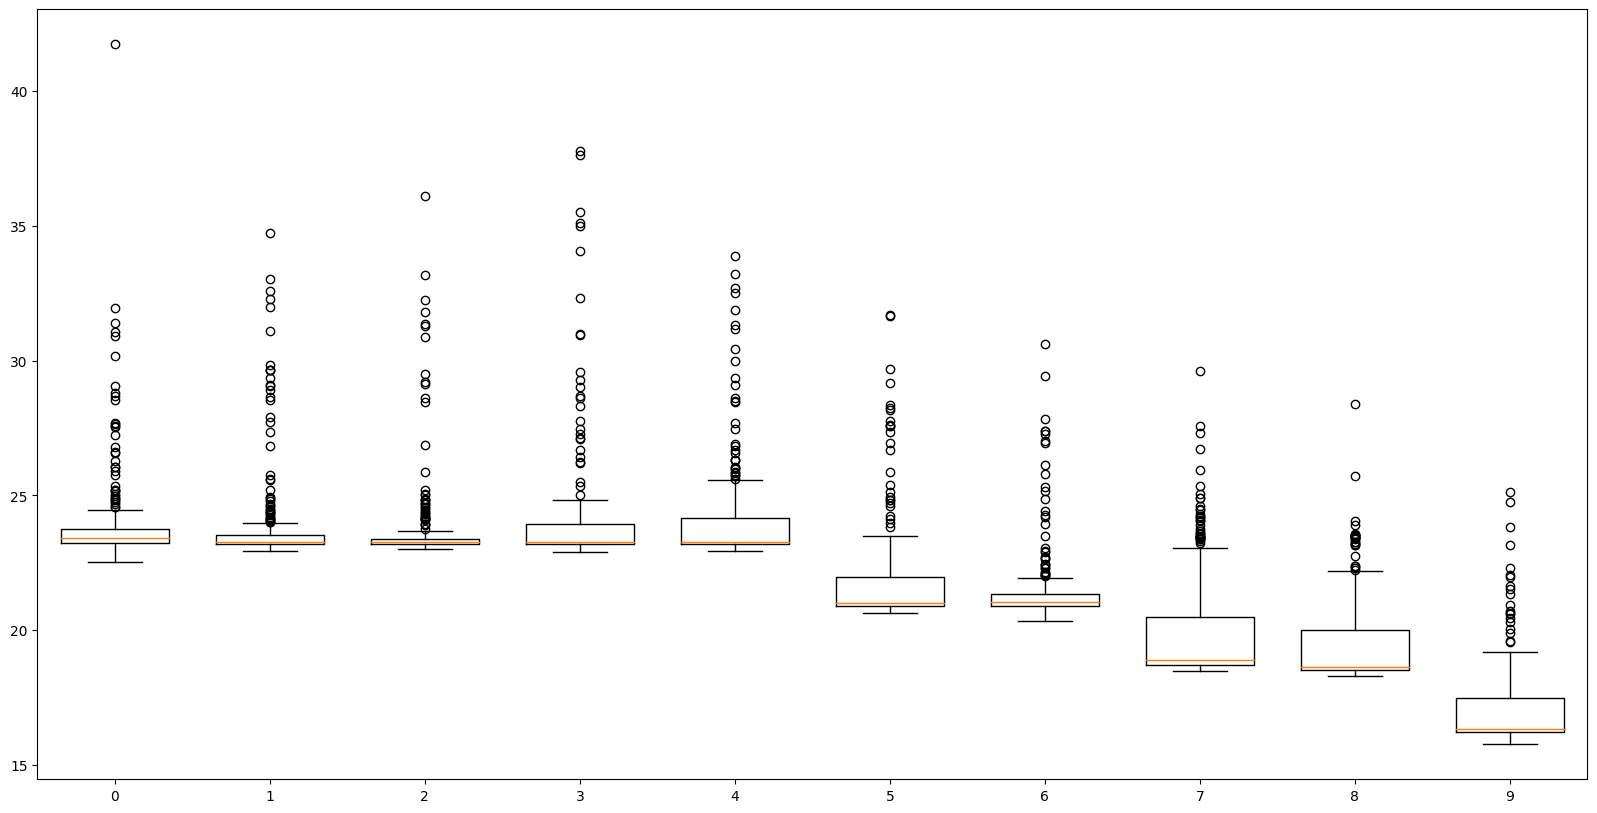

In [247]:
plt.figure(figsize=(20, 10))
for pos, tol in enumerate(tol_set):
    plt.boxplot(
        find_specific_rows_in_data(data, [tol] + parameters)[:, -1], positions=[pos], widths=0.7
    )
plt.show()

In [216]:
parameters = [8,8,3,3,4,4,3,2,3,25,8,4,5]

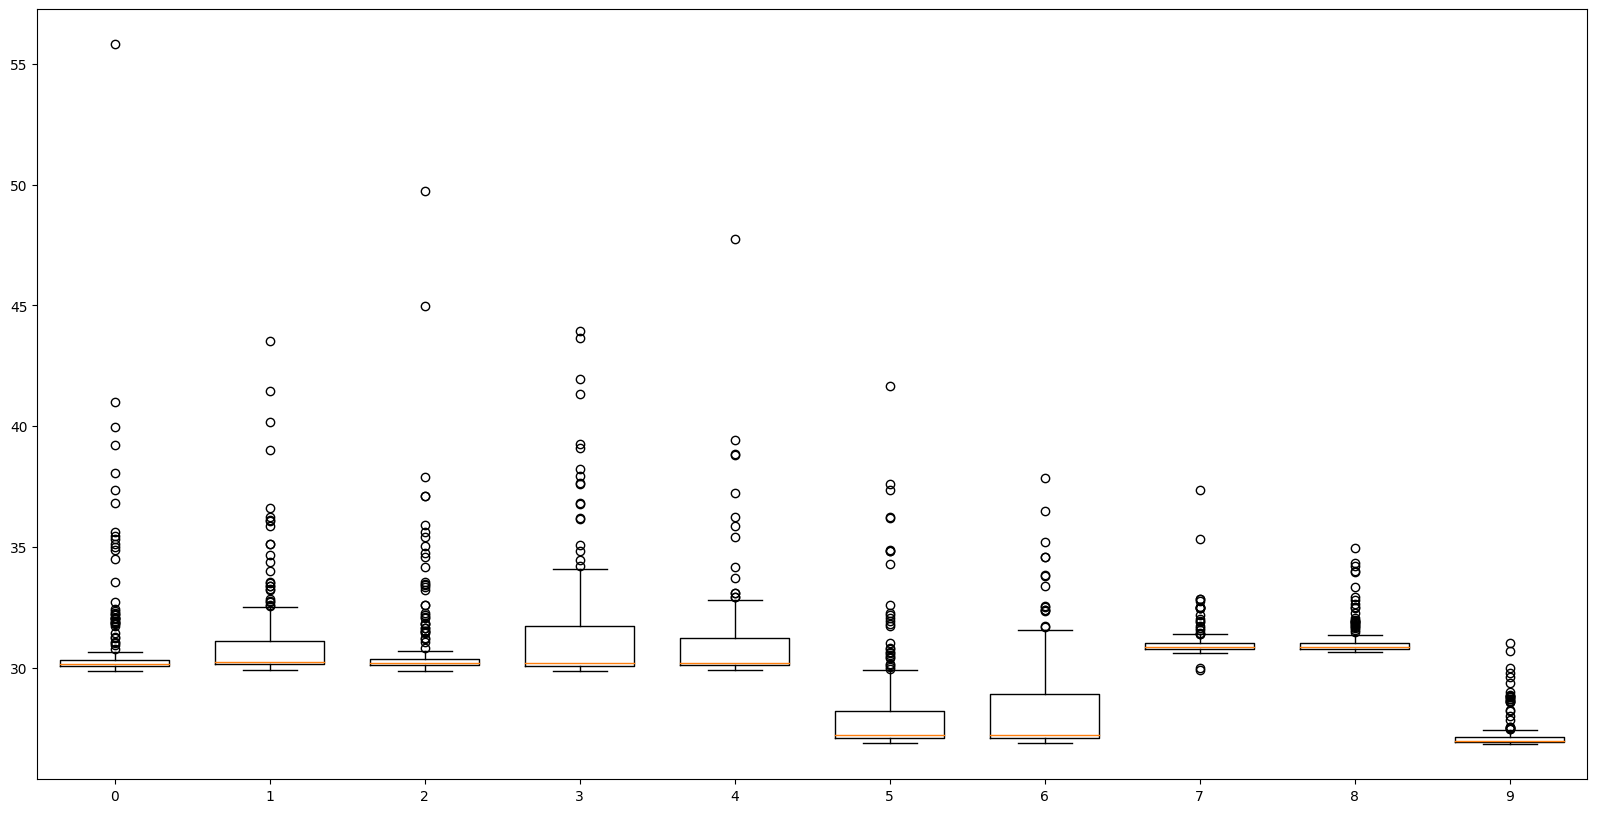

In [217]:
plt.figure(figsize=(20, 10))
for pos, tol in enumerate(tol_set):
    plt.boxplot(
        find_specific_rows_in_data(data, [tol] + parameters)[:, -1], positions=[pos], widths=0.7
    )
plt.show()

# All data per tolerance

In [218]:
tol_set = [1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]

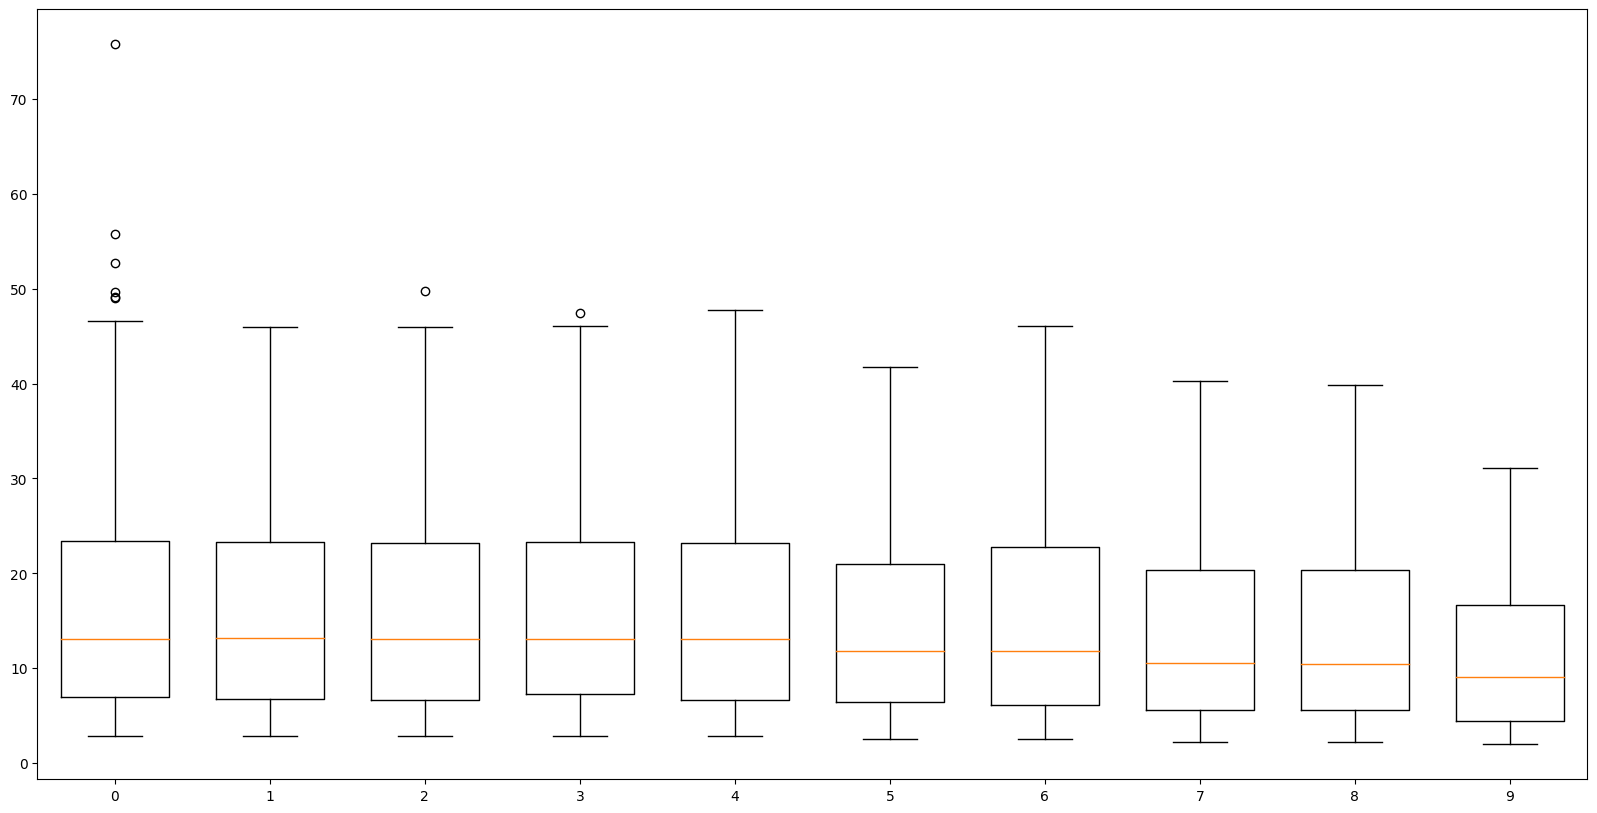

In [219]:
plt.figure(figsize=(20, 10))
for pos, tol in enumerate(tol_set):
    plt.boxplot(
        find_rows_with_specific_tolerance(data, tol)[:, -1], positions=[pos], widths=0.7
    )
plt.show()

# Boxplot for each set of repetitions

In [ ]:
parameters = [8,8,3,3,4,4,3,2,3,25,8,4,5]

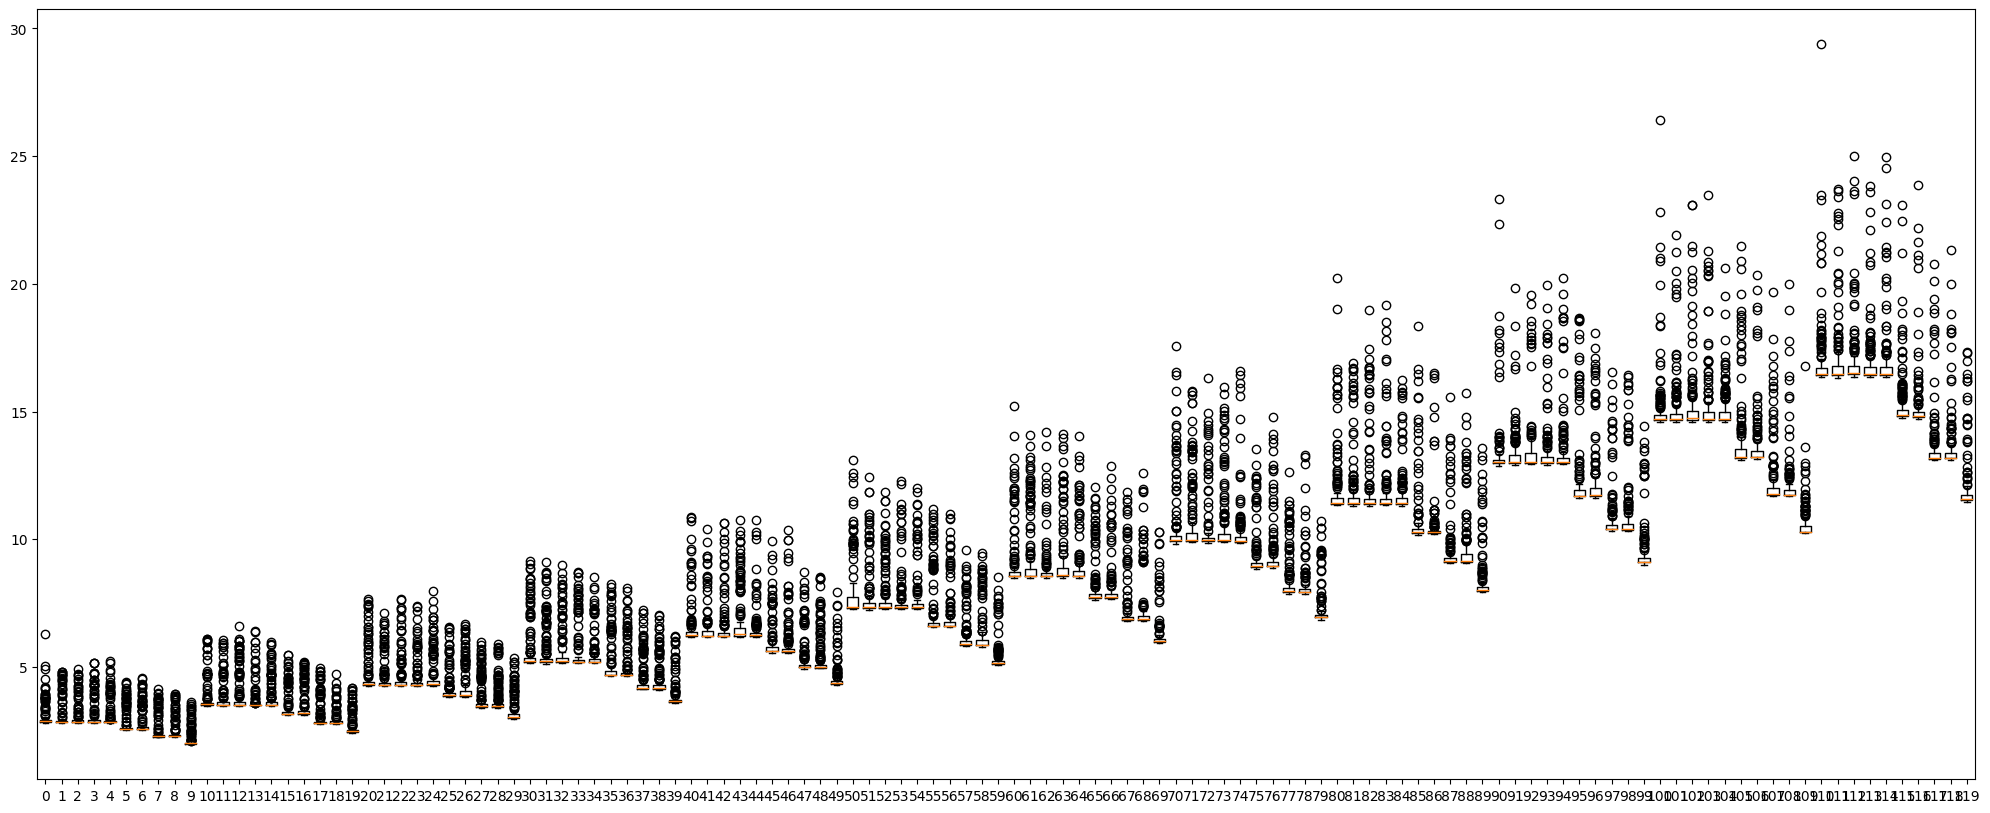

In [271]:
plt.figure(figsize=(25, 10))
count = 0
for threshold_count in range(8, 20):
    for pos, tol in enumerate(tol_set):
        parameters[9] = threshold_count
        plt.boxplot(
            find_specific_rows_in_data(data, [tol] + parameters)[:, -1], positions=[count], widths=0.7
        )
        count += 1
plt.show()

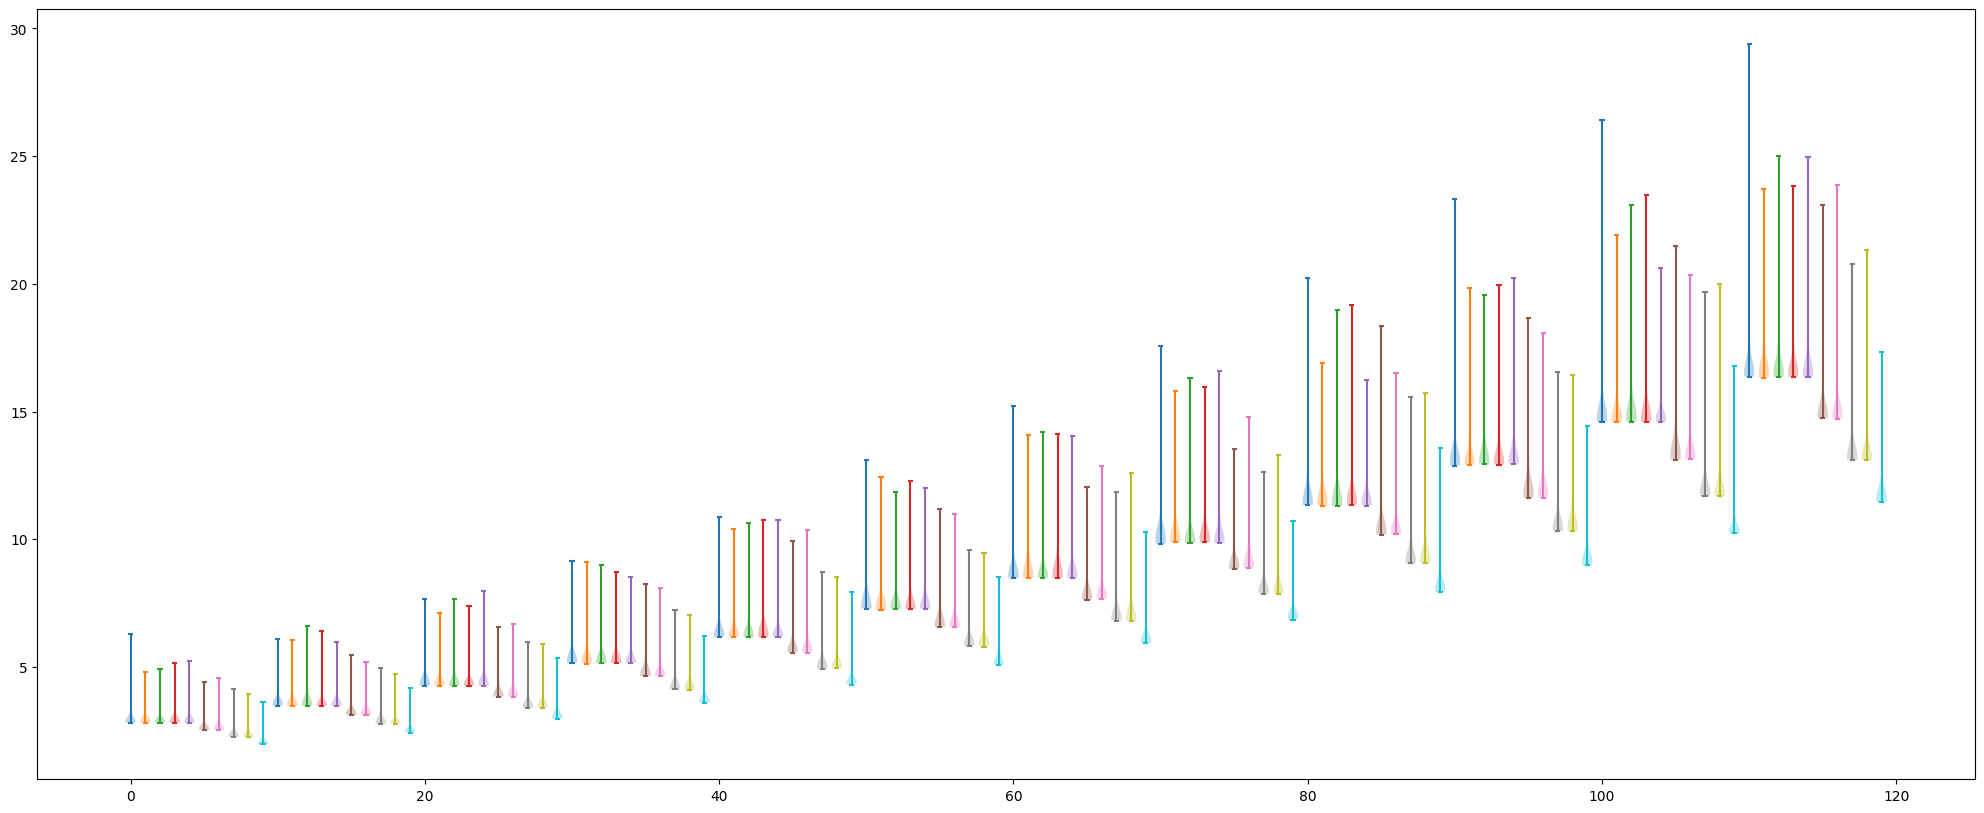

In [268]:
plt.figure(figsize=(25, 10))
count = 0
for threshold_count in range(8, 20):
    for pos, tol in enumerate(tol_set):
        parameters[9] = threshold_count
        plt.violinplot(
            find_specific_rows_in_data(data, [tol] + parameters)[:, -1], positions=[count], widths=0.7
        )
        count += 1
plt.show()

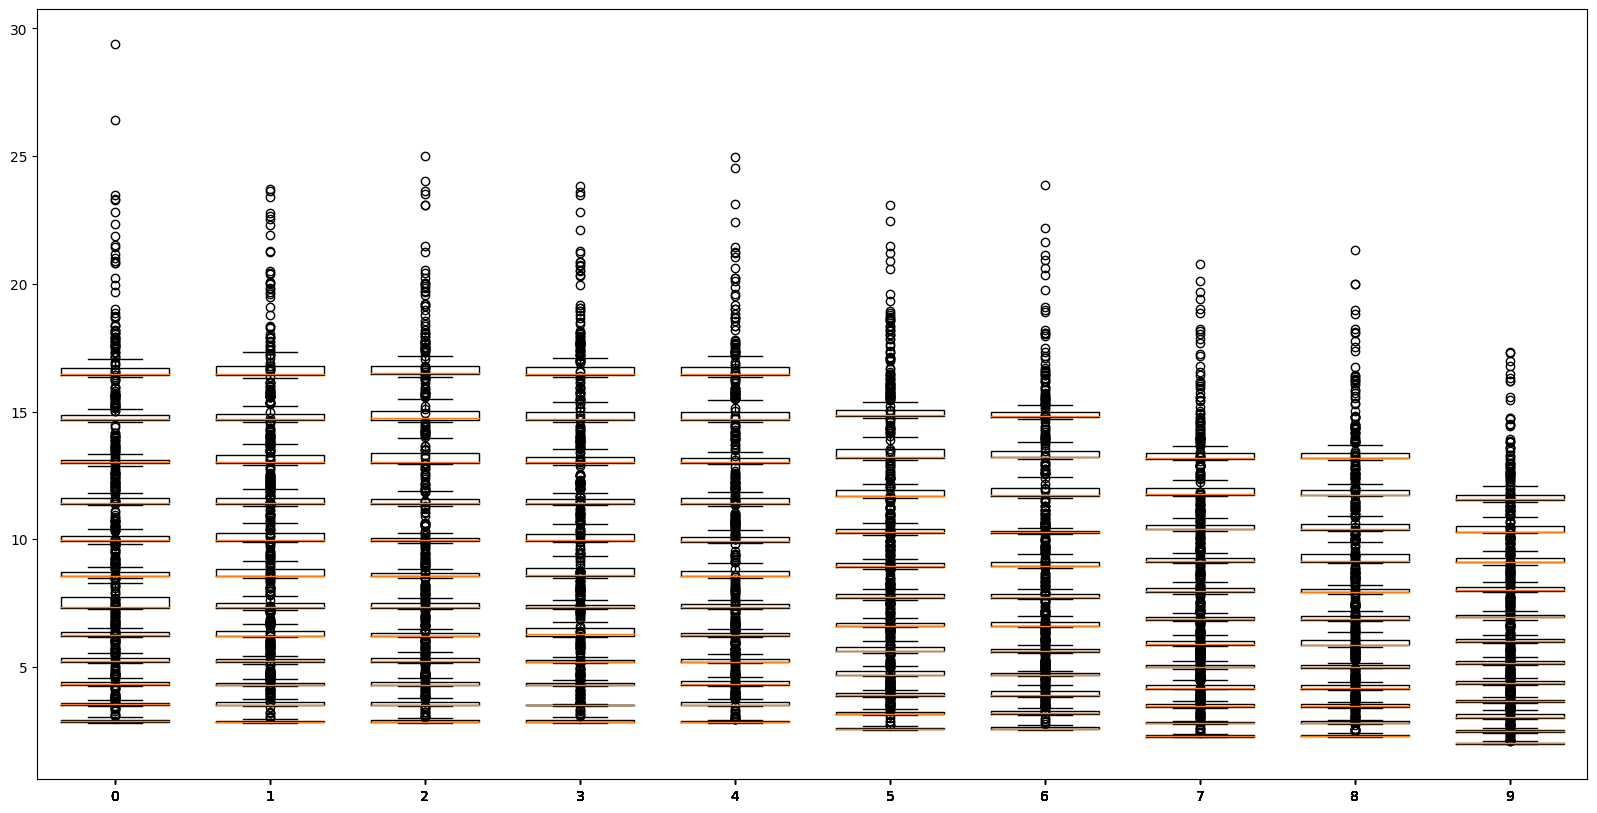

In [270]:
plt.figure(figsize=(20, 10))
for threshold_count in range(8, 20):
    for pos, tol in enumerate(tol_set):
        parameters[9] = threshold_count
        plt.boxplot(
            find_specific_rows_in_data(data, [tol] + parameters)[:, -1], positions=[pos], widths=0.7
        )
plt.show()

# Boxplot for each threshold

In [272]:
threshold_set = list(range(8, 26))

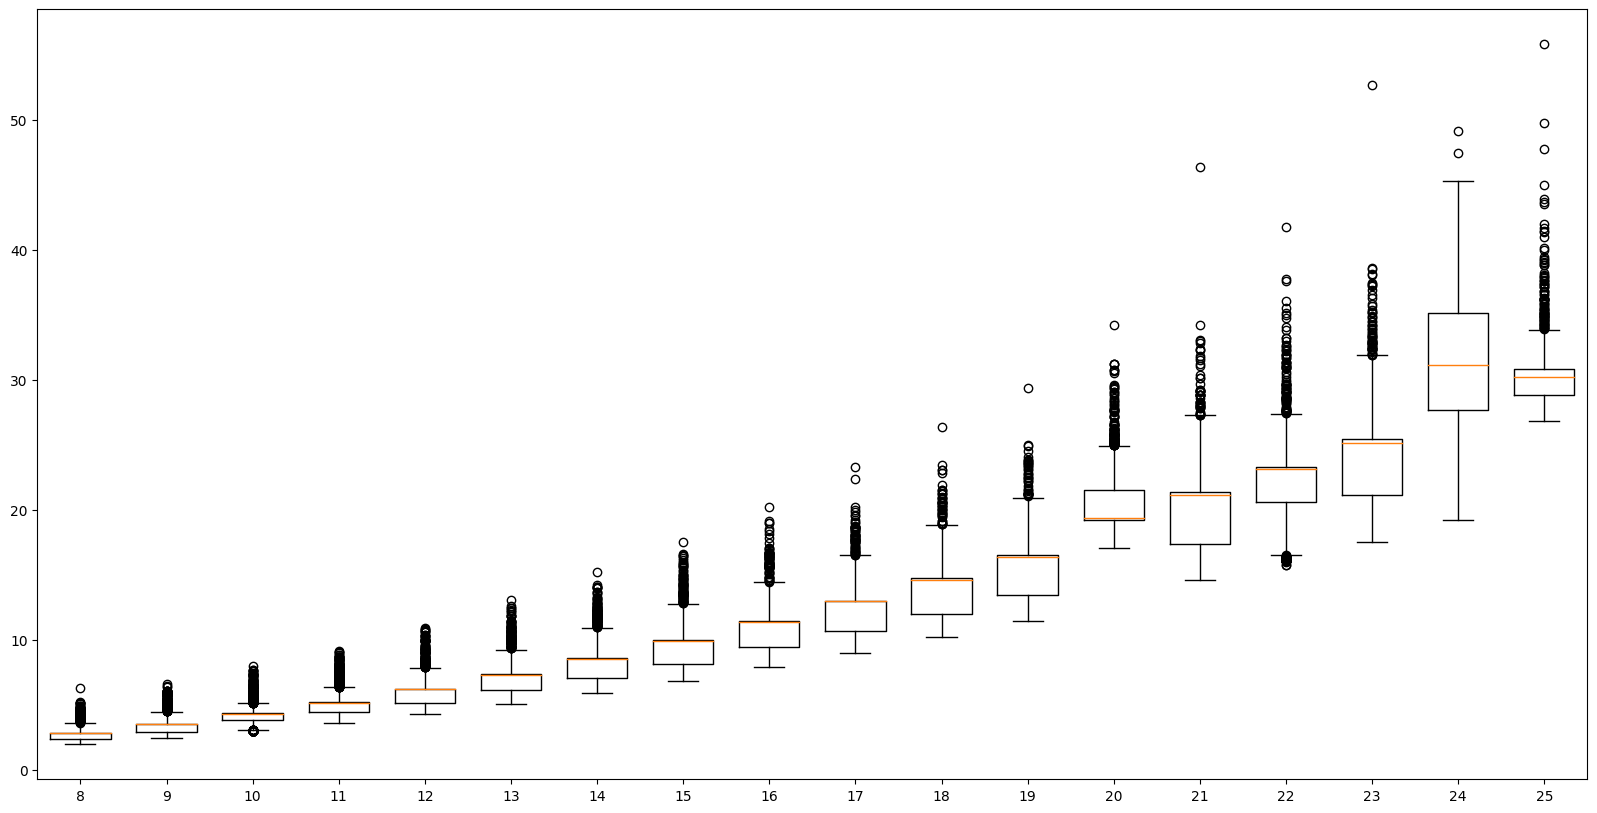

In [273]:
plt.figure(figsize=(20, 10))
parameters = [8,8,3,3,4,4,3,2,3,_,8,4,5]
for pos, thres in enumerate(threshold_set):
    parameters[9] = thres
    plt.boxplot(
        find_specific_rows_in_data(data, parameters, start=2)[:, -1], positions=[pos + 8], widths=0.7
    )
plt.show()

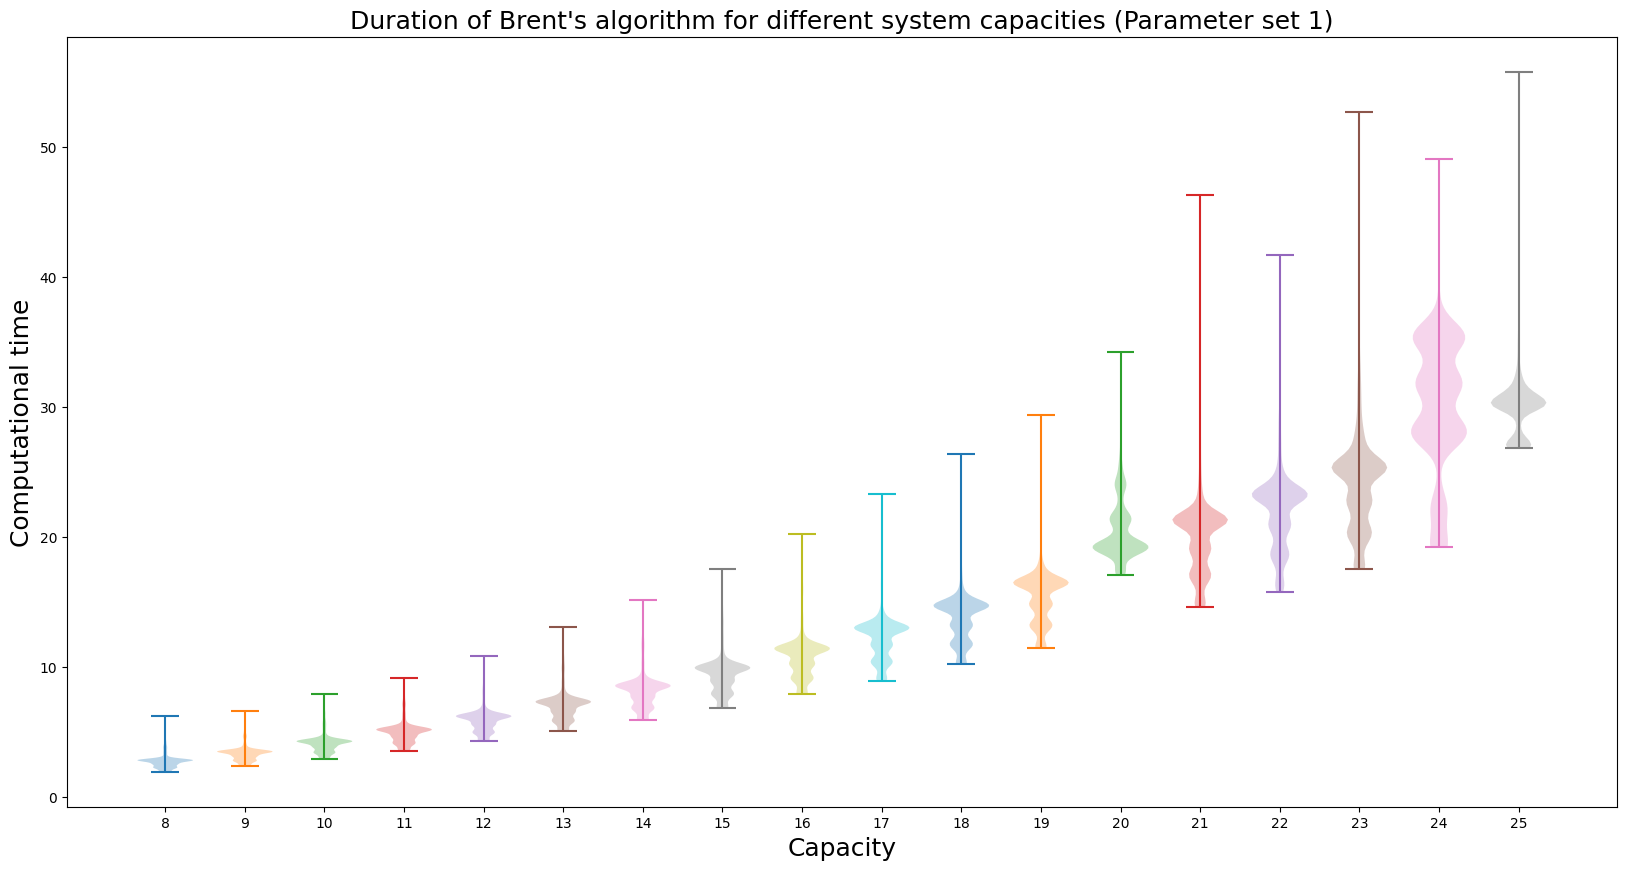

In [9]:
parameters = [8,8,3,3,4,4,3,2,3,_,8,4,5]
system_capacity_set = list(range(8, 26))

plt.figure(figsize=(20, 10)) 
for pos, capacity in enumerate(system_capacity_set):
    parameters[9] = capacity
    plt.violinplot(
        find_specific_rows_in_data(data, parameters, start=2)[:, -1], positions=[pos + 8], widths=0.7
    )
    plt.xticks(system_capacity_set, system_capacity_set)
    plt.xlabel("Capacity", fontsize=18)
    plt.ylabel("Computational time", fontsize=18)
    plt.title("Duration of Brent's algorithm for different system capacities (Parameter set 1)", fontsize=18)
plt.savefig("tolerance_violinplots_1.pdf");

# Lineplot for each threshold and each set of repetitions

In [27]:
tol_set = [1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
parameters = [8,8,3,3,4,4,3,2,3,_,8,4,5]
system_capacity_set = list(range(8, 26))

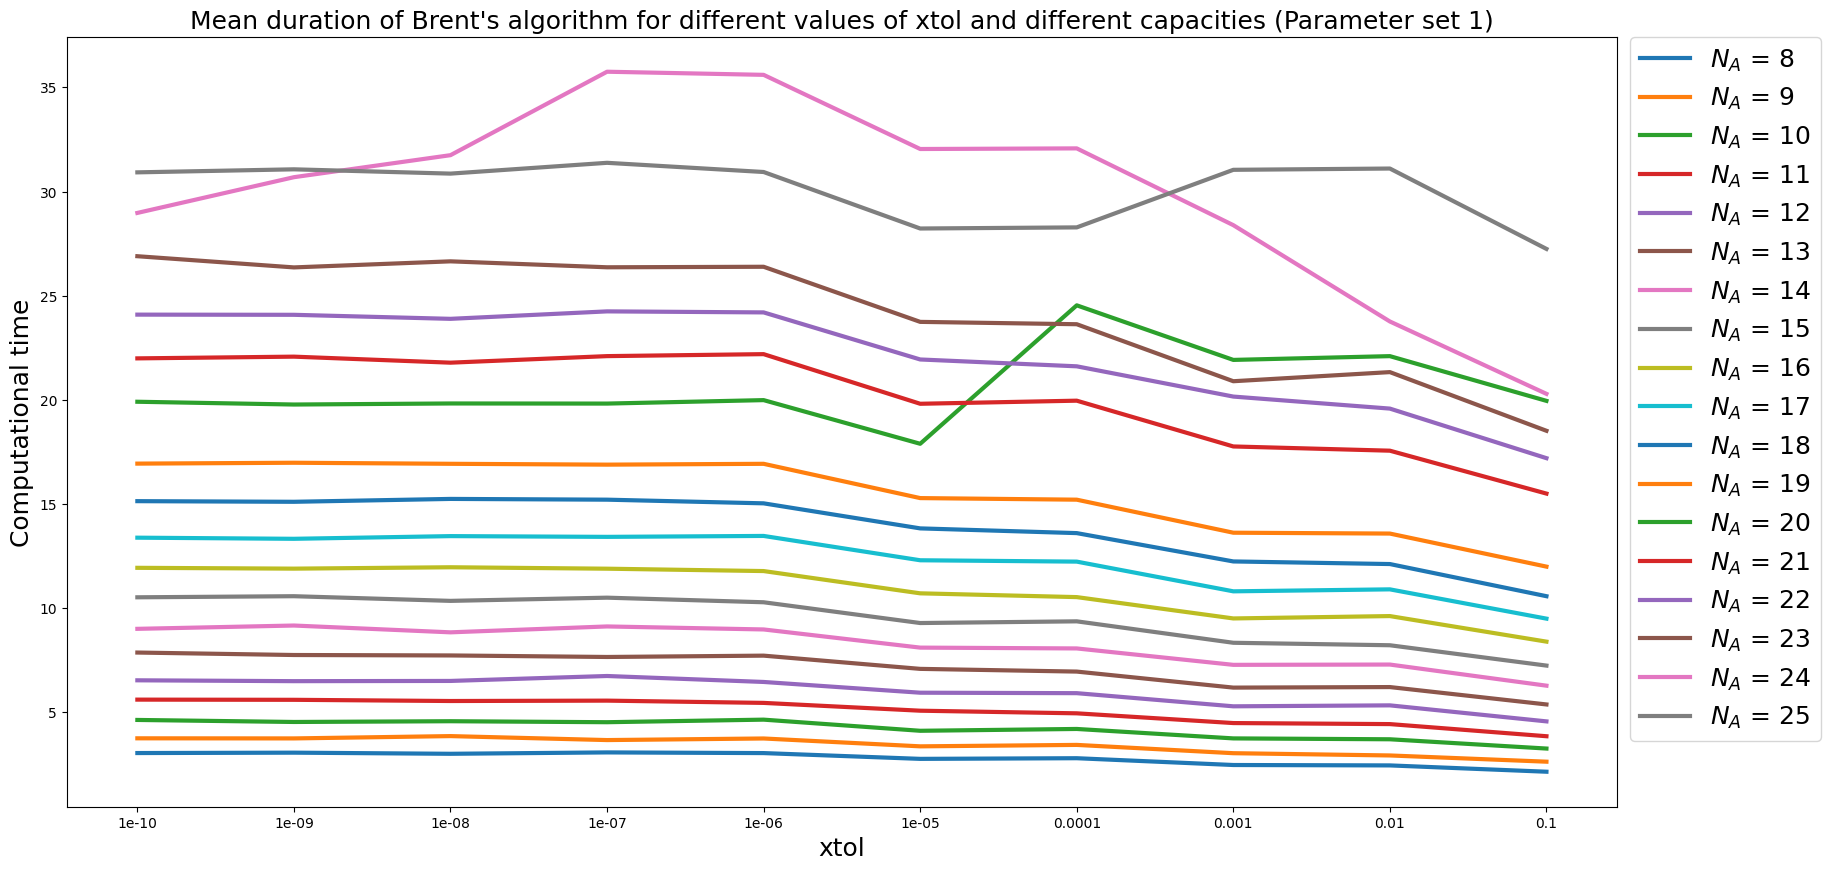

In [28]:
plt.figure(figsize=(20, 10))
for N_count in system_capacity_set:
    plot_list = []
    parameters[9] = N_count
    for tol in tol_set:
        plot_list.append(np.mean(find_specific_rows_in_data(data, [tol] + parameters)[:, -1]))
    plt.plot(plot_list, label=f"$N_A$ = {N_count}", linewidth=3)
    plt.xticks(range(len(tol_set)), tol_set)
plt.xlabel("xtol", fontsize=18)
plt.ylabel("Computational time", fontsize=18)
plt.title(
    "Mean duration of Brent's algorithm for different values of xtol and different capacities (Parameter set 1)",
    fontsize=18
)
plt.legend(bbox_to_anchor=(1.07, 1), loc='upper center', borderaxespad=0, fontsize=18)
plt.savefig("tolerance_lineplots_1.pdf");